In [1]:
import empiricaldist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import FreqTab
from thinkstats import decorate

# PMFs

A `pmf` object is like a `FreqTab` that contains probabilities instead of frequencies.

In [2]:
ftab = FreqTab.from_seq([1, 2, 2, 4, 5])
ftab

,freqs
1,1
2,2
4,1
5,1


- Sum of the frequencies = Size of the original sequence.

In [3]:
n = ftab.sum()
n

np.int64(5)

- by dividing the frequencies by `n`, they represent proportions, rather than counts.

In [4]:
pmf = ftab/n
pmf

,probs
1,0.2
2,0.4
4,0.2
5,0.2


- Above results indicates:
  - 20% of the values in the sequence are 1
  - 40% are 2 and so on
- These probability also mean that **if we choose a random value from the original sequence then the probability, we choose 1 is 0.2**

- The sum of the probability is 1, which means that this distribution is **normalized**.

In [5]:
pmf.sum()

np.float64(1.0)

- A normalized `FreqTab` object represents a **Probability mass function** (PMF).
- Probabilities associated with discrete values are also called **Probability Masses**.

- Normalizing the frequency table with `Pmf` object.

In [6]:
from empiricaldist import Pmf

pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [7]:
# A normalized pmf has total probability is 1
pmf.sum()

np.float64(1.0)

In [8]:
print(pmf[2], pmf(2))

0.4 0.4


- Assigning and operations are same as operations performed on list items.

In [9]:
pmf[2] = 0.2
pmf(2)

np.float64(0.2)

In [10]:
pmf[2] += 0.3
pmf

,probs
1,0.2
2,0.5
3,0.2
5,0.2


In [11]:
pmf[2] *= 0.5
pmf

,probs
1,0.20
2,0.25
3,0.20
5,0.20


In [12]:
pmf.sum()

np.float64(0.8500000000000001)

In [13]:
# renormalize the pmf again
pmf.normalize()

np.float64(0.8500000000000001)

- Copying the `Pmf`

In [14]:
pmf.copy()

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


# Summarizing a PMF

- Suppose, we compute the PMF of the values from a sequence.

In [15]:
seq = [1, 2, 2, 3, 5]
mean = np.sum(seq)/len(seq)
mean

np.float64(2.6)

In [16]:
pmf = Pmf.from_seq(seq)

# Computing the Mean using PMF

In [17]:
mean = np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6)

In [18]:
# using the mean method
pmf.mean()

np.float64(2.6)

- Given a `Pmf`, we can compute the variance by computing the deviations of each queantity from the mean.

In [19]:
deviations = pmf.qs - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

In [20]:
var = np.sum(pmf.ps * deviations**2)
var

np.float64(1.84)

- Variance using `var` method:

In [21]:
pmf.var()

np.float64(1.84)

- Computing the standard deviations using the variance.

In [22]:
np.sqrt(var)

np.float64(1.3564659966250536)

- Standard deviation using `std` method

In [23]:
pmf.std()

np.float64(1.3564659966250536)

- Computing `mode`

In [24]:
pmf.mode()

np.int64(2)

# The class size paradox

- Suppose that a college offers 65 classes in a given semester, and we are given the number of classes in each of the following size ranges.

In [25]:
ranges = pd.interval_range(start=5, end=50, freq=5, closed="left")
ranges.name = "class size"

data = pd.DataFrame(index=ranges)
data["count"] = [8, 8, 14, 4, 6, 12, 8, 3, 2]
data

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [26]:
sizes = ranges.left + 2 # Xi values
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [27]:
counts = data["count"]
actual_pmf = Pmf(counts, sizes, name="actual")
actual_pmf.normalize()

np.int64(65)

- If we ask the college for the average class size, the report the mean of this distribution, which is 23.7

In [28]:
actual_pmf.mean()

np.float64(23.692307692307693)

- The following function takes the actual `pmf` of class and makes a new `Pmf` that represents the class sizes as seen by studenst.

In [29]:
def bias(pmf, name):
    # multiply each probability by class size
    ps = pmf.ps * pmf.qs

    # make a new Pmf and normalize it
    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [30]:
observed_pmf = bias(actual_pmf, name="observed")

- Plot the two distributions

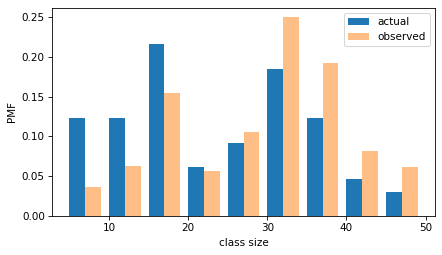

In [31]:
from thinkstats import two_bar_plots

two_bar_plots(actual_pmf, observed_pmf, width=2)
decorate(xlabel="class size", ylabel="PMF")

- The mean of observerd mean is 25% higher than actual mean

In [32]:
observed_pmf.mean()

np.float64(29.123376623376622)

In [33]:
def unbias(pmf, name):
    ps = pmf.ps/pmf.qs

    new_pmf = Pmf(ps, pmf.qs, name=name)
    new_pmf.normalize()
    return new_pmf

In [34]:
debiased_pmf = unbias(observed_pmf, "dibiased")
debiased_pmf.mean()

np.float64(23.692307692307693)

The mean of the debiased Pmf is the same as the mean of the actual distribution we started with.

# NSFG Data

In [35]:
import statadict
from nsfg import get_nsfg_groups

In [36]:
live, firsts, others = get_nsfg_groups()

In [37]:
first_pmf = Pmf.from_seq(firsts["prglngth"], name="firsts")
others_pmf = Pmf.from_seq(others["prglngth"], name="others_pmf")

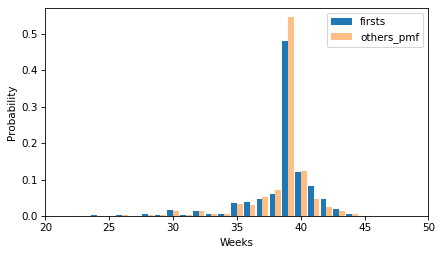

In [38]:
two_bar_plots(first_pmf, others_pmf)
decorate(xlabel="Weeks", ylabel="Probability", xlim=[20, 50])

# Other visualizations

In [39]:
weeks = range(35, 46)
first_pmf(weeks)

array([0.03602991, 0.03897575, 0.04713347, 0.06163608, 0.4790392 ,
       0.12145932, 0.08157716, 0.04645366, 0.01971448, 0.00521187,
       0.00135962])

In [40]:
others_pmf(weeks)

array([0.03210137, 0.03146779, 0.05216473, 0.07074974, 0.54466737,
       0.12249208, 0.04794087, 0.02597677, 0.01288279, 0.00485744,
       0.00084477])

In [41]:
diffs = first_pmf(weeks) - others_pmf(weeks)
diffs

array([ 0.00392854,  0.00750796, -0.00503126, -0.00911366, -0.06562817,
       -0.00103276,  0.03363629,  0.02047689,  0.00683169,  0.00035443,
        0.00051485])

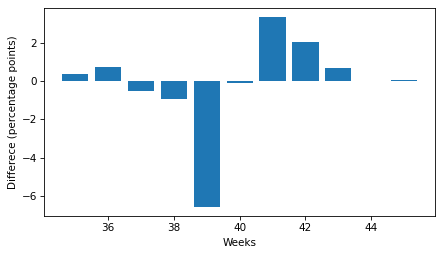

In [42]:
plt.bar(weeks, diffs * 100)
decorate(xlabel="Weeks", ylabel="Differece (percentage points)")

# Exercises
---

# Exercise 3.1

In [43]:
from nsfg import read_fem_resp
resp = read_fem_resp()
resp.shape

(7643, 3092)

In [50]:
num_babes = resp["numbabes"].value_counts(dropna=False).sort_index()
num_babes

numbabes
0     3229
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
97       1
Name: count, dtype: int64

In [51]:
numbabes.sum()

np.int64(7643)

In [69]:
resp["numbabes"] = resp["numbabes"].replace([97], np.nan)

In [70]:
numbabes = resp["numbabes"].value_counts().sort_index()
numbabes

numbabes
0.0     3229
1.0     1519
2.0     1603
3.0      828
4.0      309
5.0       95
6.0       29
7.0       15
8.0        8
9.0        2
10.0       3
Name: count, dtype: int64

In [71]:
numbabes.sum()

np.int64(7640)

In [72]:
pmf = Pmf(numbabes, name="Numbabes")

In [73]:
pmf.normalize()

np.int64(7640)

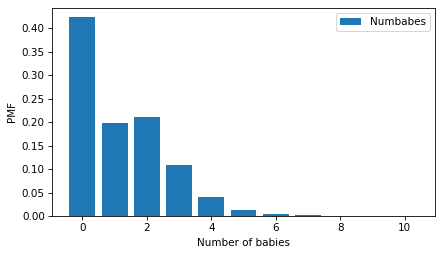

In [74]:
pmf.bar()
decorate(xlabel="Number of babies", ylabel="PMF")

> **ANSWER :** The graph is left-skewed representing outliers

## Exercise 3.2

Given a sample, we can compute the skewness by computing the sum of the cubed deviations and dividing by the standard deviation cubed. For example, here’s how we compute the skewness of numbabes.

In [80]:
deviations = numbabes - numbabes.mean()
skewness = np.mean(deviations ** 3) / numbabes.std(ddof=0) ** 3
skewness

np.float64(1.4717867544497194)

In [91]:
def pmf_skewness(pmf):
    deviations = pmf.qs - pmf.mean()
    add =  np.sum((deviations**3) * pmf.ps)
    skewness = add/pmf.std()**3
    return skewness

In [92]:
pmf_skewness(pmf)

np.float64(1.194783385244598)